In [1]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
%matplotlib inline

# Time Series Challenge

-Plot the time series, along with any logical or necessary differences to get a stationary dataset  
-Generate and interpret a PACF for the time series (and/or its differences)  
-Generate 5 ARIMA specifications and evaluate their efficacy at modeling your data  
-Finally choose one specification and make the case for that as a logical model for your dataset  

I am going to use GDP from 1990-2019. This data is available on the FRED's website.

In [2]:
#load dataset
gdp_df = pd.read_csv(
    r'C:\Users\Lowe\Documents\Thinkful\Datasets\GDPC2.csv')

In [3]:
gdp_df.head()

,DATE,GDPC1
0,1990-01-01,9358.289
1,1990-04-01,9392.251
2,1990-07-01,9398.499
3,1990-10-01,9312.937
4,1991-01-01,9269.367


In [4]:
gdp_df.dtypes

DATE      object
GDPC1    float64
dtype: object

The feature GDPC1 is already numeric.

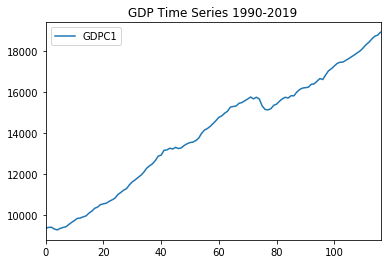

In [5]:
#plot the series
gdp_df.plot()
plt.title('GDP Time Series 1990-2019')
plt.show()

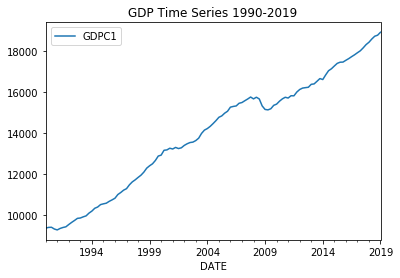

In [6]:
#fix x axis to be more easily interpretable
gdp_df.index = pd.to_datetime(gdp_df.DATE)
gdp_df.plot()
plt.title('GDP Time Series 1990-2019')
plt.show()

There is certainly a trend to this series. I will need to apply differencing to make the series stationary so that I can fit ARIMA models. 

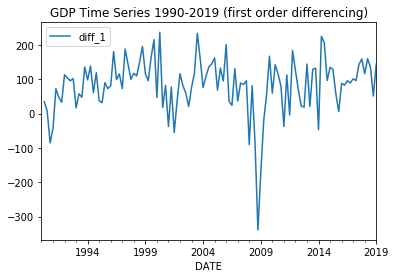

In [7]:
gdp_df['diff_1'] = gdp_df.GDPC1 - gdp_df.GDPC1.shift()
gdp_df.plot(y='diff_1')
plt.title('GDP Time Series 1990-2019 (first order differencing)')
plt.show()

The first order differencing seems to have mostly removed the trend. This should now meet the required assumptions of the ARIMA models. Now, I will generated the PACF and the first order differences.

Text(0.5, 1.0, 'GDP')

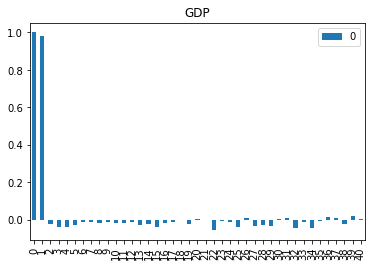

In [8]:
x_acf = pd.DataFrame(pacf(gdp_df.GDPC1))
x_acf.plot(kind='bar')
plt.title("GDP")

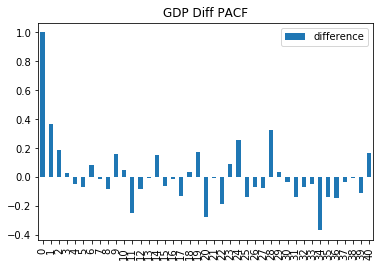

In [9]:
x_acf = pd.DataFrame(pacf(gdp_df.diff_1[1:]))
x_acf.plot(kind='bar')
plt.title("GDP Diff PACF")
plt.legend(['difference'])

The initial series shows one strong correlation. The differences show 2 correlations. I will first build an ARIMA model with p set to 1 and I set to 2. I will then try models with different p, i, and q values to compare them.

### Model 1

In [11]:
model = ARIMA(gdp_df.GDPC1, order=(1,2,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:               D2.GDPC1   No. Observations:                  115
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -669.693
Method:                       css-mle   S.D. of innovations             81.740
Date:                Wed, 06 May 2020   AIC                           1345.386
Time:                        11:52:02   BIC                           1353.621
Sample:                    07-01-1990   HQIC                          1348.729
                         - 01-01-2019                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.7859      5.311      0.148      0.883      -9.624      11.196
ar.L1.D2.GDPC1    -0.4390      0.084     -5.252      0.000      -0.603      -0.275
                                    

C:\Users\Lowe\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\Lowe\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


Model 1 has an AIC of 1345.386 and a log likelihood of -669.693. This is decent and these estimates are certainly better than the ones generated in the previous checkpoint. The log likelihood indicates the log of the likelihood that Model 1 would generate this data. The closer to zero, the higher the probablity we are to have predicted our outcome with our given model. A log-likelihood of -669 certainly is not very close to zero, but it could be worse. I will have to compare this AIC estimate to the other models below to see which is best. 

### Model 2

In [12]:
model = ARIMA(gdp_df.GDPC1, order=(1,2,1))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:               D2.GDPC1   No. Observations:                  115
Model:                 ARIMA(1, 2, 1)   Log Likelihood                -662.457
Method:                       css-mle   S.D. of innovations             76.374
Date:                Wed, 06 May 2020   AIC                           1332.915
Time:                        11:53:22   BIC                           1343.894
Sample:                    07-01-1990   HQIC                          1337.371
                         - 01-01-2019                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5331      1.087      0.491      0.625      -1.597       2.663
ar.L1.D2.GDPC1     0.3145      0.167      1.889      0.062      -0.012       0.641
ma.L1.D2.GDPC1    -0.9257      0.123

C:\Users\Lowe\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\Lowe\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


Model 2 (order = 1,2,1) has slightly better AIC (1332.915) and log-likelihood (-662.457) estimates in comparison to Model 1.  

### Model 3

In [14]:
model = ARIMA(gdp_df.GDPC1, order=(1,2,2))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

C:\Users\Lowe\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\Lowe\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D2.GDPC1   No. Observations:                  115
Model:                 ARIMA(1, 2, 2)   Log Likelihood                -660.288
Method:                       css-mle   S.D. of innovations             74.265
Date:                Wed, 06 May 2020   AIC                           1330.577
Time:                        11:54:27   BIC                           1344.301
Sample:                    07-01-1990   HQIC                          1336.147
                         - 01-01-2019                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2179      0.426      0.512      0.610      -0.617       1.052
ar.L1.D2.GDPC1     0.7213      0.139      5.185      0.000       0.449       0.994
ma.L1.D2.GDPC1    -1.3997      0.176

Model 3 (order = 1,2,2) has the smallest AIC (1330.577) and log-likelihood (-660.288) estimates thus far. So far, this is the winning model based on the AIC and log-likelihood estimates.  

### Model 4

In [16]:
model = ARIMA(gdp_df.GDPC1, order=(2,2,2))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:               D2.GDPC1   No. Observations:                  115
Model:                 ARIMA(2, 2, 2)   Log Likelihood                -660.074
Method:                       css-mle   S.D. of innovations             74.099
Date:                Wed, 06 May 2020   AIC                           1332.148
Time:                        11:55:47   BIC                           1348.618
Sample:                    07-01-1990   HQIC                          1338.833
                         - 01-01-2019                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1994      0.412      0.484      0.629      -0.608       1.007
ar.L1.D2.GDPC1     0.4666      0.397      1.174      0.243      -0.312       1.245
ar.L2.D2.GDPC1     0.1315      0.181

C:\Users\Lowe\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\Lowe\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


Model 4 (order = 2,2,2) has an AIC of 1332.148 and a log-likehood estimate of -660.074. The log-likelihoods of models 3 and 4 are nearly identical (and both are better than models 1 and 2), but the AIC is smaller in model 3. Model 3 is the best fit model thus far.

### Model 5

In [19]:
model = ARIMA(gdp_df.GDPC1, order=(0,1,2))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                D.GDPC1   No. Observations:                  116
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -665.437
Method:                       css-mle   S.D. of innovations             74.964
Date:                Wed, 06 May 2020   AIC                           1338.874
Time:                        11:57:10   BIC                           1349.888
Sample:                    04-01-1990   HQIC                          1343.345
                         - 01-01-2019                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            82.5816     10.194      8.101      0.000      62.601     102.562
ma.L1.D.GDPC1     0.2669      0.096      2.789      0.006       0.079       0.454
ma.L2.D.GDPC1     0.2035      0.087     

C:\Users\Lowe\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\Lowe\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


Model 5 (order = 0,1,2) has a log-likelihood estimate of -665.437 and an AIC of 1338.874. Based on these metrics alone, Models 3 and 4 outperform Model 5 in terms of fitting this data.

Model 3 appears to be the most efficient at modeling this data. I want to compare the AIC estimates to make sure that this is the best decision.

In [21]:
#Model 3 AIC compared to all other models' AIC estimates
from numpy import math
#compare to model 1
print(math.exp((1330.577-1345.386)/2))
#compare to model 2
print(math.exp((1330.577-1332.915)/2))
#compare to model 4
print(math.exp((1330.577-1332.148)/2))
#compare to model 5
print(math.exp((1330.577-1338.874)/2))

0.0006085083033657385
0.3106774634419672
0.45589169894022774
0.015788080853420927


The above estimates indicate that Model 3 significantly outperforms models 1 and 5. Model 3 is also a better fit to the data than Models 2 and 4, but the difference between Model 3 and Models 4 and 5 is not as large as the one between Model 3 and Models 1 and 5. This tells me that the PACF plots were very helpful in allowing me to pick the best p and I values (1 and 2), as the best performing model used these numbers. I was able to tweak the MA number in the various models, holding p and I constant in the first few models, to find that an MA of 2 is the best for this specific series. The most appropriate order is (1,2,2) for this series.  In other words, this time series is best modeled with 1 autocorrelation term, 2 difference terms, and 2 moving average terms.

## Exploring Model 3

Let's check out the residuals from model 3 to make sure they are normally distributed and random.

C:\Users\Lowe\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\Lowe\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'Histogram of Residuals')

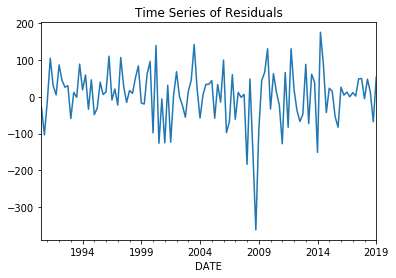

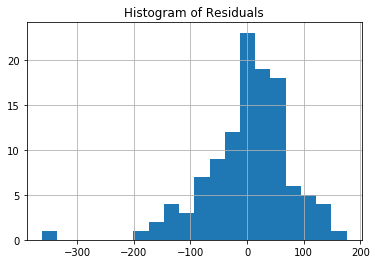

In [22]:
model = ARIMA(gdp_df.GDPC1, order=(1,2,2))
model_fit = model.fit()

residuals = pd.DataFrame(model_fit.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')

There does not seem to be any clear trend based on the plot of the residuals, though there is some volatility. The histogram indicates that the residuals are close enough to the standard normal. 

### Model 3 Interpretation

In [24]:
model = ARIMA(gdp_df.GDPC1, order=(1,2,2))
model_fit = model.fit()
print(model_fit.summary())

C:\Users\Lowe\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)
C:\Users\Lowe\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D2.GDPC1   No. Observations:                  115
Model:                 ARIMA(1, 2, 2)   Log Likelihood                -660.288
Method:                       css-mle   S.D. of innovations             74.265
Date:                Wed, 06 May 2020   AIC                           1330.577
Time:                        12:40:57   BIC                           1344.301
Sample:                    07-01-1990   HQIC                          1336.147
                         - 01-01-2019                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2179      0.426      0.512      0.610      -0.617       1.052
ar.L1.D2.GDPC1     0.7213      0.139      5.185      0.000       0.449       0.994
ma.L1.D2.GDPC1    -1.3997      0.176

The constant in Model 3 is 0.2170. Then, each day is quite close to the previous day's value (as indicated by the AR1 coefficient being 0.72).